In [2]:
import numpy as np
import matplotlib.pyplot as plt
from subprocess import call
import os
import pandas as pd
# import random
import glob
import sys
sys.path.append('../')
from package_global_functions import *

extSSDpath = getExternalSSDpath()
if os.path.exists(extSSDpath):
    gillRessPath = extSSDpath + getProjectFoldername() + '/gillespie_sim_ci/results'
    ABResPath = extSSDpath + getProjectFoldername() + '/stationary_distributions/data'
else:
    print('eeeeeap')

In [16]:
N = 1000
pis, qs = [0.1, 0.1], [9.0, 10.0]
l, lci = 0.6, 0.6
# ci_kwargs = [2, 0.3, 10.0]
ci_kwargs = [1, 0.35, 40.0]
# ci_kwargs = [0, ]
ic = 'N'

pichain = '_'.join([str(pi) for pi in pis])
qchain = '_'.join([str(q) for q in qs])
ci_kwargs_chain = '_'.join([str(cikw) for cikw in ci_kwargs])

ABData = pd.read_csv(ABResPath +f'/stat_data_N_{N}_pi1_{pis[0]}_pi2_{pis[1]}_q1_{qs[0]}_q2_{qs[1]}_l_{l}_lci_{lci}_cikw_{ci_kwargs_chain}.csv')
gillData = pd.read_csv(gillRessPath + f'/sim_pis_{pichain}_qs_{qchain}_l_{l}_lci_{lci}_cikw_{ci_kwargs_chain}_N_{N}_ic_{ic}.csv')

0.4160000000000001 0.5839999999999994
0.42 0.5799999999999994


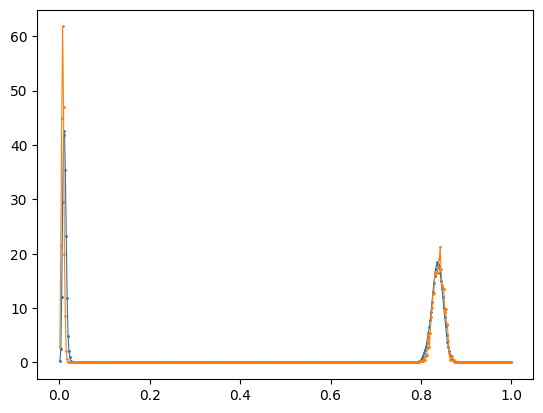

In [17]:
fig, ax = plt.subplots()

histG, bin_edges = np.histogram(gillData['f2'], bins=499, range=(0,1.0), density=True)
bin_centers = (bin_edges[1:] + bin_edges[:-1])/2
ax.plot(bin_centers, histG, marker='.', ms=2, lw=0.8)

histAB, bin_edges = np.histogram(ABData['f2'], bins=499, range=(0,1.0), density=True)
bin_centers = (bin_edges[1:] + bin_edges[:-1])/2
ax.plot(bin_centers, histAB, marker='.', ms=2, lw=0.8)

for hist in [histG, histAB]:
    binWidth = bin_edges[1]-bin_edges[0]
    prob1 = sum(hist[bin_centers<0.5]*binWidth)
    prob2 = sum(hist[bin_centers>=0.5]*binWidth)
    print(prob1, prob2)
